<a href="https://colab.research.google.com/github/willisseptiani/TelcoCustomerChurn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telco Customer Churn**

#Use Case

*   Use Case Summary
*   Objective Statement:
*   Challenges:
*   Methodology / Analytic Technique:
*   Business Benefit:
*   Expected Outcome:


#Business Understanding

#Data Understanding

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3 (IBM Sample Data Sets).

Source Data: Online retail dataset by Kaggle. https://www.kaggle.com/blastchar/telco-customer-churn

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

Data Dictionary:
InvoiceNo: Invoice number uniquely assigned to each transaction.
StockCode: Product (item) code.
Description: Product (item) name.
Quantity: The quantities of each product (item) per transaction.
InvoiceDate: The day and time when each transaction was generated.
UnitPrice: Product price per unit in sterling.
CustomerID: Customer number uniquely assigned to each customer.
Country: The name of the country where each customer resides.

*   `customerID` : A unique ID that identifies each customer
*   `gender` : Whether the customer is a male or a female
*   `SeniorCitizen` : Whether the customer is a senior citizen or not (1,0)
*   `Partner` : Whether the customer has a partner or not (Yes, No)
*   `Dependents` : Whether the customer has dependents or not (Yes, No)
*   `tenure` : Number of months the customer has stayed with the company
*   `PhoneService` : Whether the customer has a phone service or not (Yes, No)
*   `MultipleLines` : Whether the customer has multiple lines or not (Yes, No, No phone service)
*   `InternetService` : Customer's internet service provider (DSL, Fiber optic, No)
*   `OnlineSecurity` : Whether the customer has online security or not (Yes, No, No internet service)
*   `OnlineBackup` : Indicates if the customer subscribes to an additional online backup service provided by the company (Yes, No, No internet service)
*   `DeviceProtection` : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company (Yes, No, No internet service)
*   `TechSupport` : Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times (Yes, No, No internet service)
*   `StreamingTV` : Indicates if the customer uses their Internet service to stream television programing from a third party provider (Yes, No, No internet service)
*   `StreamingMovies` : Indicates if the customer uses their Internet service to stream movies from a third party provider (Yes, No, No internet service)
*   `Contract` : Indicates the customer’s current contract type (Month-to-Month, One Year, Two Year)
*   `PaperlessBilling` : Indicates if the customer has chosen paperless billing (Yes, No)
*   `PaymentMethod` : Indicates how the customer pays their bill (Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check)
*   `MonthlyCharges` : Indicates the customer’s current total monthly charge for all their services from the company
*   `TotalCharges` : Indicates the customer’s total charges, calculated to the end of the quarter specified above
*   `Churn` : Indicates the customer left the company this quarter or not (Yes, No)

#Data Preparation

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Dataset
df = pd.read_csv('/content/drive/MyDrive/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Display the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Get the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In the info of dataframe, we can see the `TotalCharges` column is categorical data. We will change the categorical data to numeric data because the data in the `TotalCharges` column is a number of type string, and for easy evaluation it must be changed to numeric data.

#Data Cleansing

In [ ]:
# Change TotalCharges column to numeric data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation:
*   There are only 11 missing values, all of them for the `TotalCharges` column.

In [ ]:
# Remove the rows in the dataframe whose column has missing values.
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
# Check duplicate rows
df.duplicated().sum()

0

Observation:
*   There are no duplicates found.

In [ ]:
# Change SeniorCitixen column to categorical data
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x==0 else 'No')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,Yes,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Separate categorical and numerical columns
category = ['gender', 'SeniorCitizen', 'Partner',	'Dependents',	'PhoneService',	'MultipleLines', 'InternetService',	'OnlineSecurity', 'OnlineBackup',	
            'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod',	'Churn']
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# Numerical statistical summary
df[numeric].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Observation:
*   The minimim and maximum values make sense for each column.
*   Mean < 50% in `MonthlyCharges` column indicating negatively skewed distribution.
*   Mean > 50% in `tenure` and `TotalCharges` columns indicating positively skewed distribution.

In [ ]:
# Describe method on categorical data
df[category].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,Yes,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
# Check unique value for category columns
for column in category:
  print(f"unique value of {column} column")
  print(df[column].unique(),'\n')

unique value of gender column
['Female' 'Male'] 

unique value of SeniorCitizen column
['Yes' 'No'] 

unique value of Partner column
['Yes' 'No'] 

unique value of Dependents column
['No' 'Yes'] 

unique value of PhoneService column
['No' 'Yes'] 

unique value of MultipleLines column
['No phone service' 'No' 'Yes'] 

unique value of InternetService column
['DSL' 'Fiber optic' 'No'] 

unique value of OnlineSecurity column
['No' 'Yes' 'No internet service'] 

unique value of OnlineBackup column
['Yes' 'No' 'No internet service'] 

unique value of DeviceProtection column
['No' 'Yes' 'No internet service'] 

unique value of TechSupport column
['No' 'Yes' 'No internet service'] 

unique value of StreamingTV column
['No' 'Yes' 'No internet service'] 

unique value of StreamingMovies column
['No' 'Yes' 'No internet service'] 

unique value of Contract column
['Month-to-month' 'One year' 'Two year'] 

unique value of PaperlessBilling column
['Yes' 'No'] 

unique value of PaymentMethod column
[

Observation:
*  ` gender`, `SeniorCitizen`,	`Partner`,	`Dependents`,	`PhoneService`, `PaperlessBilling`,	and `Churn` columns have two unique values.
*   `MultipleLines`,	`InternetService`,	`OnlineSecurity`,	`OnlineBackup`,	`DeviceProtection`,	`TechSupport`,	`StreamingTV`,	`StreamingMovies`, and	`Contract` columns have three unique values.
*   `PaymentMethod` column has four unique values.

#Exploratory Data Analysis

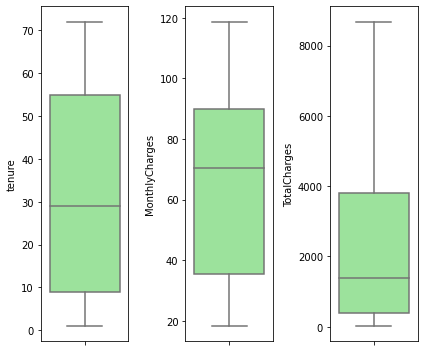

In [ ]:
plt.figure(figsize=(6,5))

for i in range(0, len(numeric)):
  plt.subplot(1, len(numeric), i+1)
  sns.boxplot(y=df[numeric[i]], color='lightgreen')
  plt.tight_layout()

Observation:
*   No outliers in numerical columns.

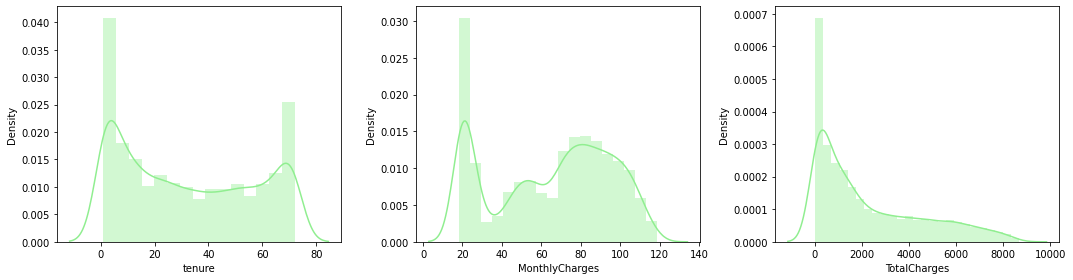

In [ ]:
plt.figure(figsize=(15,4))

for i in range(0, len(numeric)):
  plt.subplot(1, len(numeric), i+1)
  sns.distplot(x=df[numeric[i]], color='lightgreen')
  plt.xlabel(numeric[i])
  plt.tight_layout()

Observation:
*   TotalCharges column is positively skewed.

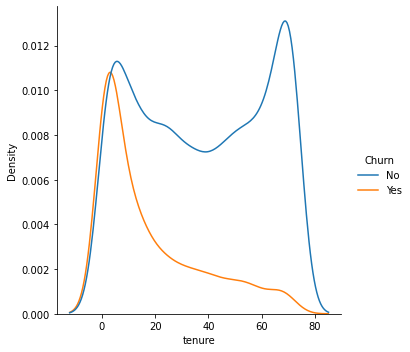

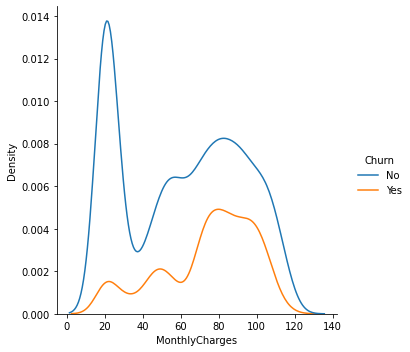

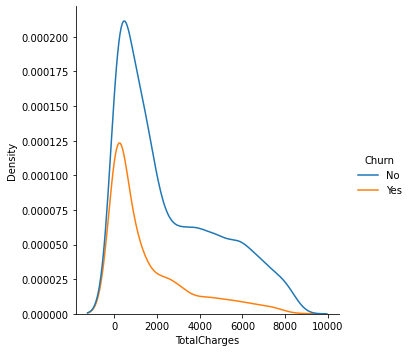

In [ ]:
#fig, ax = plt.subplots(1, figsize=(7,5))

sns.displot(data=df, x="tenure", hue="Churn", kind="kde")
sns.displot(data=df, x="MonthlyCharges", hue="Churn", kind="kde")
sns.displot(data=df, x="TotalCharges", hue="Churn", kind="kde")

#plt.tight_layout()

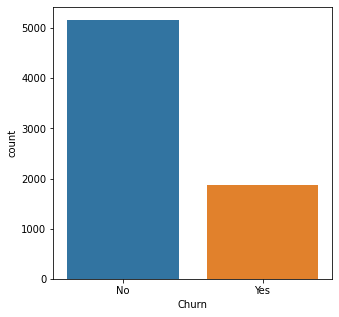

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Churn', data=df)

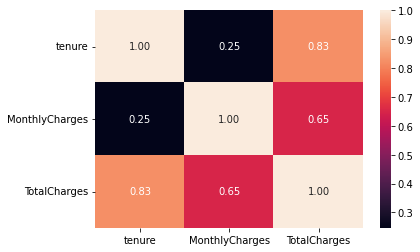

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [ ]:
#set_seed(1000)
df_sample = sample(df, 1000)
sns.pairplot(df_sample, hue='Churn')

NameError: ignored

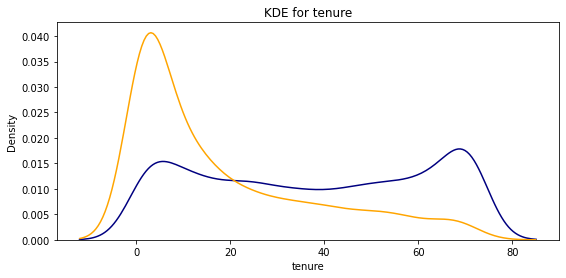

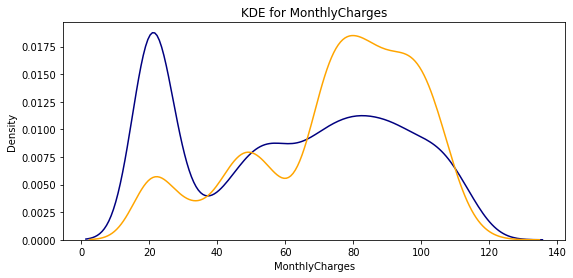

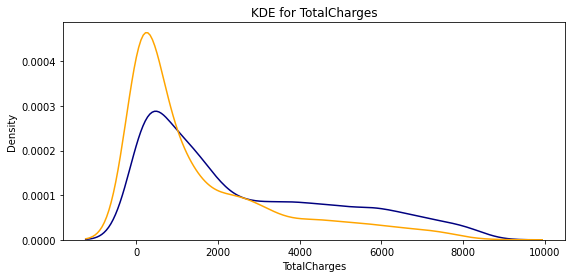

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

In [ ]:
fig, ax = plt.figure(1,3,figsize=(10,5))

sns.boxplot(x='Churn', y='tenure', data=df)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
sns.boxplot(x='Churn', y='TotalCharges', data=df)

plt.light_layout()

TypeError: ignored

#Recommendation / Conclusion

1.   The data doesn't contain major issues. There are only category column i.e. `TotalCharges` column which should be changed to numeric and some missing values.
2.   The `TotalCharges` column has positively skewed. 
3.   The minimum and maximum values make sense for each columns.
4.   From the boxplot, we can see that there are no outlier.
5.   From the barcharts ...
6.   From correlation heatmap ...
7.   From cross tabulation ...